In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

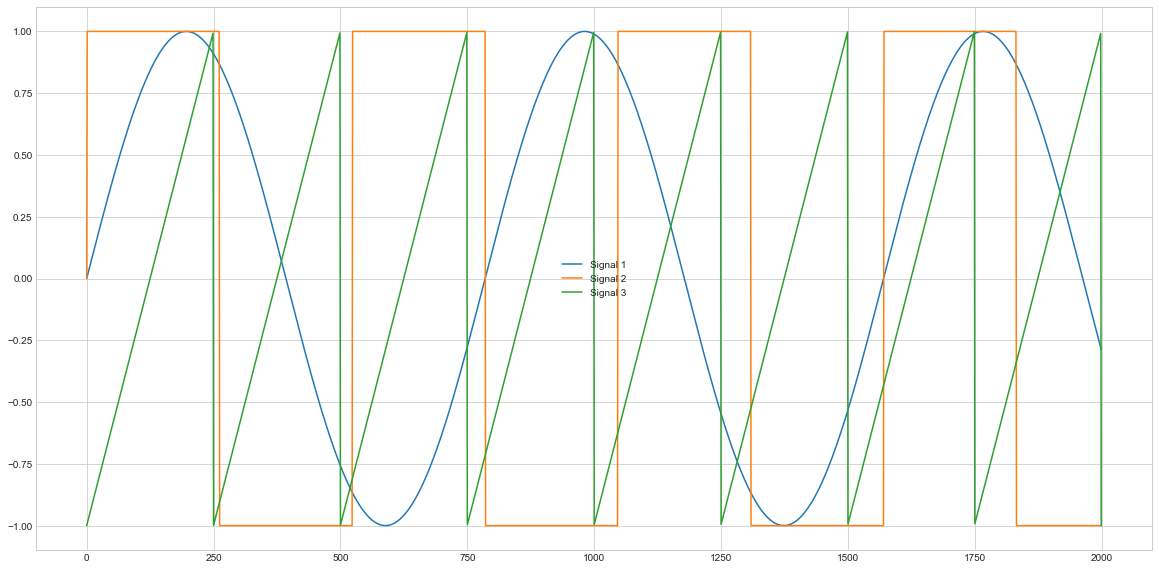

In [3]:
# ICA using Sklearn http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py
from scipy import signal
from sklearn.decomposition import FastICA, PCA
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

fig = plt.figure(figsize=(20, 10))
plt.plot(s1,label='Signal 1')
plt.plot(s2,label='Signal 2')
plt.plot(s3,label='Signal 3')
plt.legend()
plt.show()

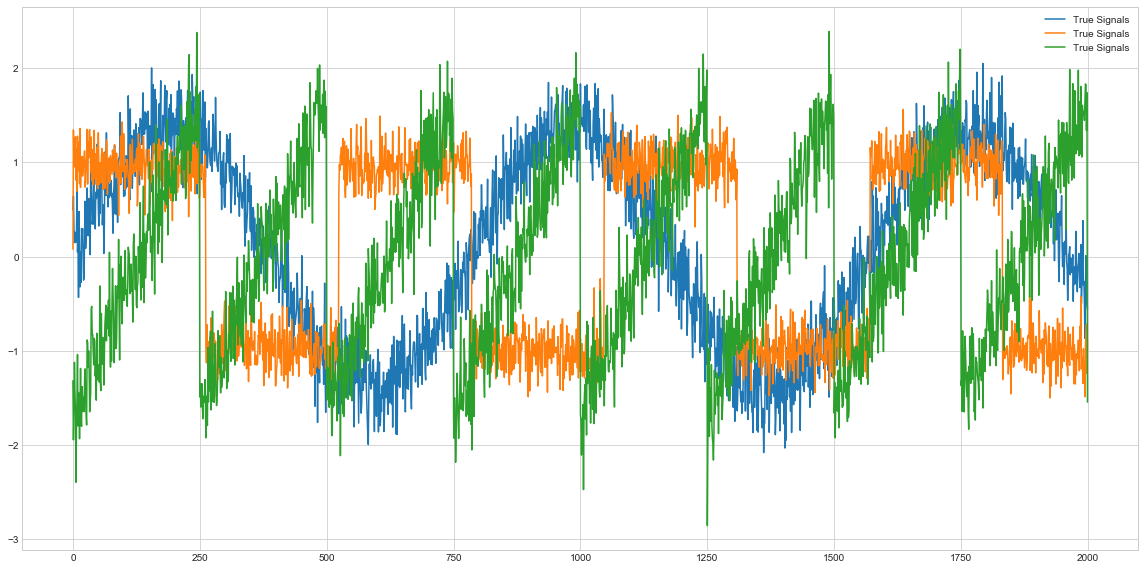

In [5]:
fig = plt.figure(figsize=(20, 10))
plt.plot(S,label='True Signals')
plt.legend()
plt.show()

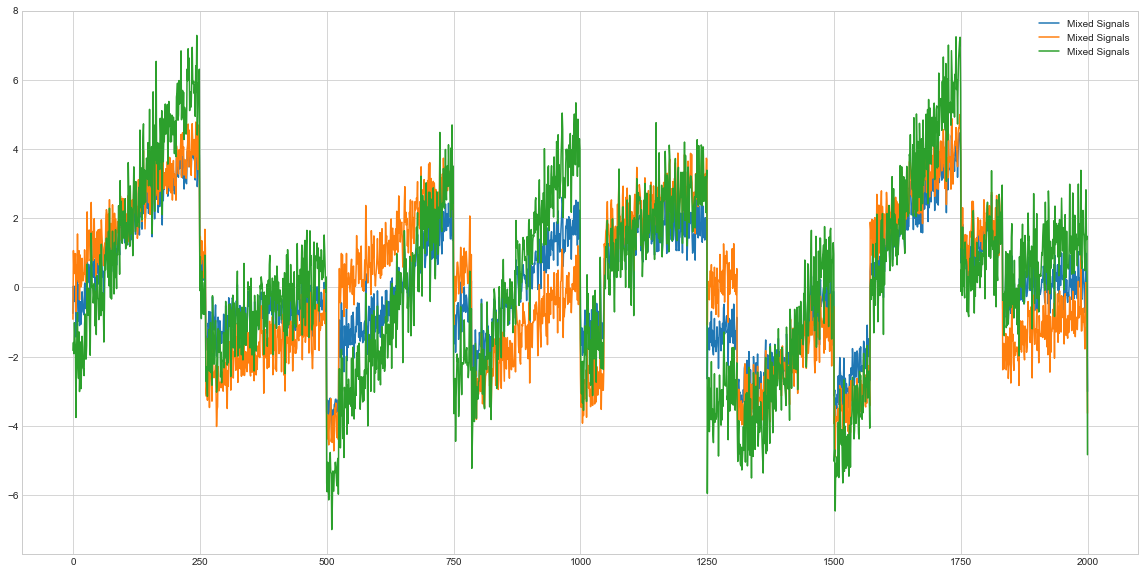

In [6]:
fig = plt.figure(figsize=(20, 10))
plt.plot(X,label='Mixed Signals')
plt.legend()
plt.show()

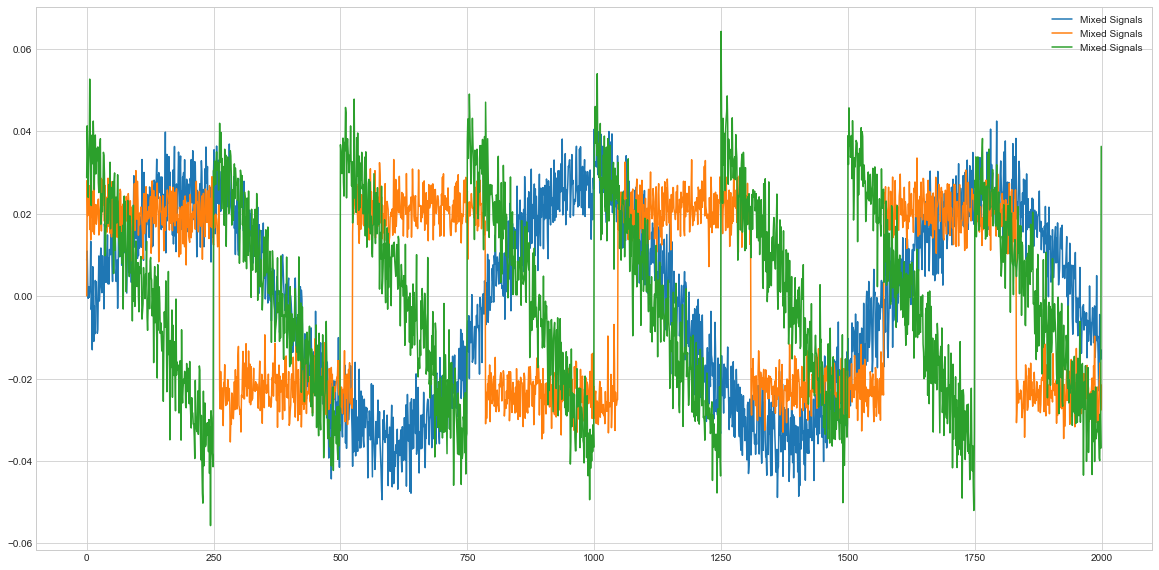

In [10]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matr
fig = plt.figure(figsize=(20, 10))
plt.plot(S_,label='Mixed Signals')
plt.legend()
plt.show()

# The colors have changed but the signlas are there

In [62]:
import scipy
from numpy import dot
from numpy.linalg import pinv
from numpy.linalg import matrix_rank, inv,svd
from numpy.random import permutation
from scipy.linalg import eigh,sqrtm
from scipy.linalg import norm as mnorm

# 1. Remove the Mean from the data
X_mean = X - np.expand_dims(np.mean(X,axis=1),1)
print(X_mean.sum())
print(X_mean.shape)
print(len(X_mean))

# 2. Calculated the Covarience Matrix 
cov = dot(X_mean.T, X_mean) / (len(X_mean) - 1)

# 3. Compute the Eigan Value and Vector
w, v = eigh(cov)

# 4. Whiten the Data
X_w = dot(X_mean,dot(sqrtm(pinv(np.diag(w))),v.T))

# 4. Calculate the rotation that aligns with the
# sum(X_w.*X_w,1)
U,s,V =svd(dot(np.expand_dims(np.sum(X_w*X_w,1),1) * X_w,X_w.T))

print(U.shape)
print(s.shape)
print(V.shape)

final_w = dot(V,sqrtm(pinv(np.diag(w))))
print(final_w.shape)

-1.1435297153639112e-14
(2000, 3)
2000
(2000, 2000)
(2000,)
(2000, 2000)


ValueError: shapes (2000,2000) and (3,3) not aligned: 2000 (dim 1) != 3 (dim 0)

In [28]:
x2d_demean = X - X.mean(axis=1).reshape((-1, 1))
print(x2d_demean.sum())
cov = dot(x2d_demean.T, x2d_demean) / (len(X_mean) - 1)
NSUB, NVOX = x2d_demean.shape
w, v = eigh(cov, eigvals=(NVOX - 3, NVOX - 1))
print(w)
print(v)

-1.1435297153639112e-14
[-8.09786887e-17  3.10920851e-01  1.47295653e+00]
[[-0.57735027  0.81638617 -0.0134273 ]
 [-0.57735027 -0.41982147 -0.70029751]
 [-0.57735027 -0.3965647   0.71372481]]
